<a href="https://colab.research.google.com/github/dianhana/mesinlearning/blob/main/ML_A11_2023_15203_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediksi Dampak Media Sosial terhadap Kesehatan Mental Gen Z Menggunakan Random Forest**

**Nama:** Dian Hana Kartiko Sari  
**NIM:** A11.2023.15203
**Kelas:** A11.4406  
**Mata Kuliah:** Pembelajaran Mesin
**Dosen Pengampu:** Abu Salam, M.Kom

---

## 1. Ringkasan & Permasalahan

**Permasalahan:**
Banyak mahasiswa mengalami tekanan mental akibat faktor akademik, sosial, dan pribadi. Deteksi dini kondisi mental mahasiswa penting untuk intervensi lebih awal.

**Tujuan:**
Memprediksi status depresi mahasiswa berdasarkan data survei menggunakan algoritma Random Forest.

**Alur Penyelesaian:**

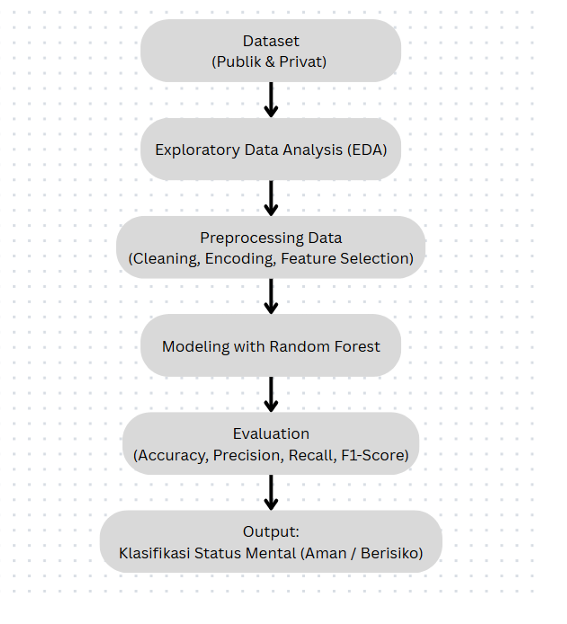

## 2. Penjelasan Dataset, EDA, dan Proses Features Dataset

**Dataset :**
Dataset yang digunakan dalam studi ini diambil dari file MentalHealthSurvey.
csv, yang menyimpan informasi hasil survei mengenai keadaan kesehatan mental mahasiswa.Ada beberapa fitur signifikan dalam dataset ini, antara lain jenis kelamin, usia, cgpa, rata-rata tidur, tekanan akademis, kekhawatiran finansial, hubungan sosial, dan depresi sebagai variabel utama.
Skala untuk nilai depresi berkisar dari 1 hingga 5, yang mencerminkan tingkat keparahan depresi, di mana angka yang lebih tinggi menunjukkan kondisi depresi yang lebih serius.

**Exploratory Data Analysis (EDA) : **
Pada tahap EDA, dilakukan analisis struktur dan isi data menggunakan fungsi info() dan describe(). Hasil menunjukkan bahwa dataset tidak mengandung missing values sehingga tidak diperlukan proses imputasi. Visualisasi awal menggunakan countplot terhadap label depression memperlihatkan bahwa distribusi kelas tidak seimbang. Kelas 2 dan 3 mendominasi data, sementara kelas 1 dan 5 relatif sedikit. Selain itu, visualisasi distribusi usia dengan histplot menunjukkan bahwa sebagian besar responden berusia antara 18 hingga 23 tahun, sesuai dengan rentang usia mahasiswa aktif.

**Preprocessing dan Feature Engineering : **
Langkah awal preprocessing melibatkan pemilihan fitur yang relevan. Data dikonversi ke bentuk numerik, seperti kolom gender yang diubah menjadi biner (Male = 1, Female = 0). Nilai cgpa dan average_sleep yang sebelumnya berbentuk rentang (misal: “2.75-3.25” atau “6-8 hrs”) dihitung rata-ratanya agar dapat digunakan sebagai fitur numerik. Nama kolom juga dirapikan agar seragam (mengganti spasi dengan underscore), dan data yang tidak valid atau kosong dihapus dengan dropna().

Selanjutnya, dilakukan konversi label target depression menjadi dua kelas untuk menyederhanakan pemodelan. Label baru bernama is_depressed dibentuk dengan ketentuan: nilai depression ≥ 4 dikategorikan sebagai Depresi (1), dan nilai < 4 sebagai Tidak Depresi (0). Semua fitur kemudian disiapkan untuk proses modeling dengan memisahkan antara fitur (X) dan label (y), lalu dilakukan pembagian data menggunakan train_test_split.

Proses ini memastikan bahwa data yang akan digunakan oleh model machine learning telah melalui tahap pembersihan, normalisasi, dan transformasi yang optimal sehingga siap digunakan untuk pelatihan model prediksi.
                            


### Import Library & Dataset

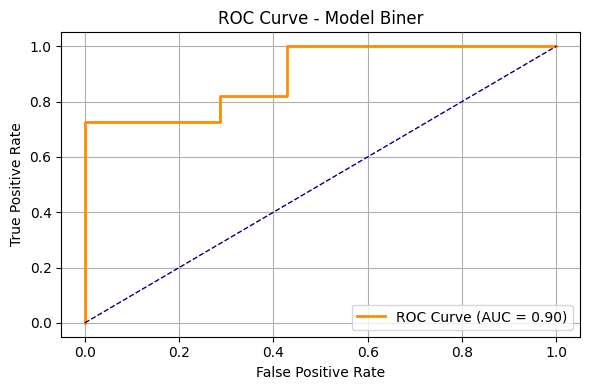

In [31]:
# STEP 1: Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# STEP 2: Load Data
df = pd.read_csv("MentalHealthSurvey.csv")

# STEP 3: Encode
categorical_cols = ['gender', 'university', 'degree_level', 'degree_major', 'academic_year', 'cgpa',
                    'residential_status', 'campus_discrimination', 'sports_engagement',
                    'average_sleep', 'stress_relief_activities']
data = df.copy()
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# STEP 4: Buat Label Biner
data['is_depressed'] = data['depression'].apply(lambda x: 1 if x >= 4 else 0)

# STEP 5: Split Fitur dan Label
X_bin = data.drop(columns=['depression', 'is_depressed'])
y_bin = data['is_depressed']

# STEP 6: Train-Test Split
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)

# STEP 7: Latih Model
model_bin = RandomForestClassifier(n_estimators=100, random_state=42)
model_bin.fit(Xb_train, yb_train)

# STEP 8: Prediksi Probabilitas Sesuai Split
y_proba = model_bin.predict_proba(Xb_test)[:, 1]

# STEP 9: ROC Curve & AUC
fpr, tpr, _ = roc_curve(yb_test, y_proba)
roc_auc = roc_auc_score(yb_test, y_proba)

# STEP 10: Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model Biner')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


### **STEP 1: Import**
Langkah awal adalah memasukkan pustaka-pustaka yang diperlukan.pandas berfungsi untuk membaca serta mengolah data, sementara matplotlib. pyplot dan seaborn diaplikasikan untuk menggambarkan data.train_test_split berperan dalam memisahkan data untuk pelatihan dan pengujian.LabelEncoder bertugas mengonversi fitur kategorikal menjadi format numerik, RandomForestClassifier diandalkan sebagai algoritma klasifikasi utama, dan roc_curve serta roc_auc_score dimanfaatkan untuk menilai model secara visual dan numerik lewat ROC Curve.

### **STEP 2: Load Data**
Dataset dibaca dari file CSV menggunakan pandas.read_csv() dan disimpan ke dalam variabel df. Dataset ini merupakan data hasil survei kesehatan mental mahasiswa.

### **STEP 3: Encode**
Kolom-kolom kategorikal seperti gender, university, dan degree_major dikodekan menjadi angka menggunakan LabelEncoder agar dapat digunakan oleh algoritma machine learning, karena model tidak bisa memproses data bertipe string secara langsung.



                            

### EDA (Exploratory Data Analysis) Singkat & Visualisasi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    87 non-null     object
 1   age                       87 non-null     int64 
 2   university                87 non-null     object
 3   degree_level              87 non-null     object
 4   degree_major              87 non-null     object
 5   academic_year             87 non-null     object
 6   cgpa                      87 non-null     object
 7   residential_status        87 non-null     object
 8   campus_discrimination     87 non-null     object
 9   sports_engagement         87 non-null     object
 10  average_sleep             87 non-null     object
 11  study_satisfaction        87 non-null     int64 
 12  academic_workload         87 non-null     int64 
 13  academic_pressure         87 non-null     int64 
 14  financial_concerns        87

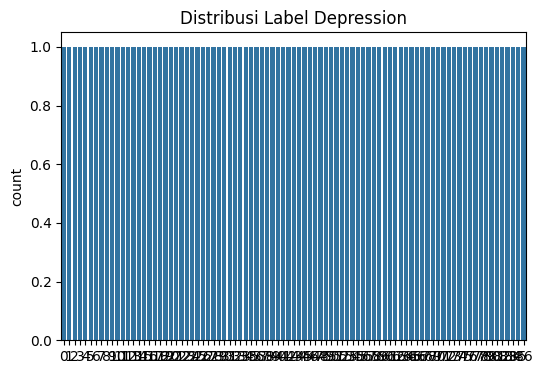

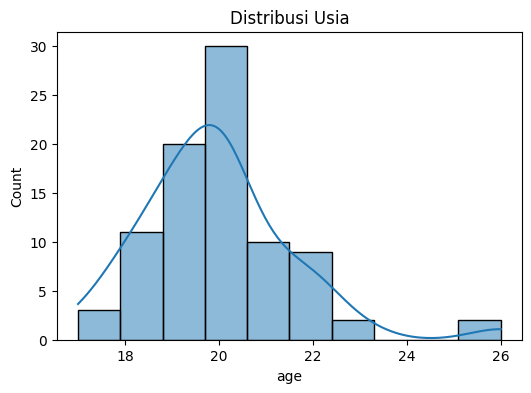

In [32]:
print(df.info())
print(df.describe(include='all'))
print('Missing values:')
print(df.isnull().sum())

plt.figure(figsize=(6,4))
sns.countplot(df['depression'])
plt.title('Distribusi Label Depression')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['age'], kde=True, bins=10)
plt.title('Distribusi Usia')
plt.show()

✅ df.info()
→ Menampilkan struktur dataset: jumlah kolom, tipe data, dan apakah ada nilai kosong.

✅ df.describe(include='all')
→ Memberikan statistik deskriptif semua kolom, seperti mean, min, max, std, unique.

✅ df.isnull().sum()
→ Mengecek jumlah missing values di setiap kolom. Hasil: tidak ada missing values.

✅ sns.countplot(df['depression'])
→ Menampilkan jumlah data di tiap label depression.
→ Terlihat distribusi tidak seimbang, kelas 2 dan 3 dominan, kelas 1 dan 5 sangat sedikit.

✅ sns.histplot(df['age'], kde=True)
→ Menampilkan distribusi usia responden.
→ Usia terbanyak berada di rentang 18–23 tahun, sesuai karakter mahasiswa.

### Preprocessing & Feature Engineering

In [33]:
fitur_pakai = [
    'gender','age','cgpa','average_sleep','academic_workload ','academic_pressure',
    'financial_concerns','social_relationships','depression'
]
df = df[fitur_pakai].copy()

df['gender'] = df['gender'].map({'Male':1, 'Female':0})

def cgpa_mid(x):
    if '-' in str(x):
        low, high = x.split('-')
        return (float(low)+float(high))/2
    try:
        return float(x)
    except:
        return np.nan
df['cgpa'] = df['cgpa'].apply(cgpa_mid)

def sleep_mid(x):
    if '-' in str(x):
        low, high = x.replace(' hrs','').replace(' hrs','').replace(' hrs','').split('-')
        return (float(low)+float(high))/2
    if '7+' in str(x):
        return 7.5
    try:
        return float(x.replace(' hrs',''))
    except:
        return np.nan
df['average_sleep'] = df['average_sleep'].apply(sleep_mid)

df.columns = df.columns.str.strip().str.replace(' ','_')
df = df.dropna()
df['depression'] = df['depression'].astype(int)
df.head()

,gender,age,cgpa,average_sleep,academic_workload,academic_pressure,financial_concerns,social_relationships,depression
0,1,20,3.25,5.0,4,5,4,3,2
1,1,20,3.25,5.0,4,4,1,3,3
2,1,20,2.75,3.0,5,5,3,4,2
3,1,20,2.75,5.0,5,4,4,1,5
4,0,20,3.25,5.0,5,5,2,3,5


✅ Pemilihan fitur penting (fitur_pakai)
→ Hanya fitur-fitur yang relevan dengan prediksi depresi yang dipilih:
gender, age, cgpa, average_sleep, academic_workload, academic_pressure, financial_concerns, social_relationships, dan depression.

✅ Encoding variabel gender
→ Kategori 'Male' diubah menjadi 1 dan 'Female' menjadi 0 agar bisa diproses oleh model.

✅ Transformasi nilai cgpa ke bentuk numerik
→ Jika nilai berupa rentang (misal 2.75-3.25), dihitung nilai rata-rata tengahnya.
→ Jika nilai sudah numerik, langsung dikonversi ke float.

✅ Transformasi nilai average_sleep ke bentuk angka
→ Jika dalam bentuk rentang waktu tidur (6-8 hrs), dihitung rata-rata.
→ Jika tertulis 7+ hrs, diubah menjadi 7.5.
→ Nilai tidur dikonversi ke float semuanya.

✅ Perapihan nama kolom
→ Spasi diganti dengan underscore (_) agar konsisten dan mudah diakses dalam kode.

✅ Penanganan nilai kosong (missing values)
→ Baris yang mengandung NaN setelah proses di atas dihapus menggunakan dropna().

✅ Konversi label depression ke tipe int
→ Agar bisa diproses sebagai label target klasifikasi.

#### Visualisasi lanjutan

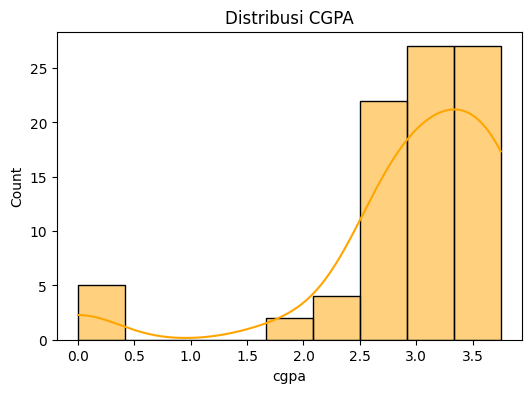

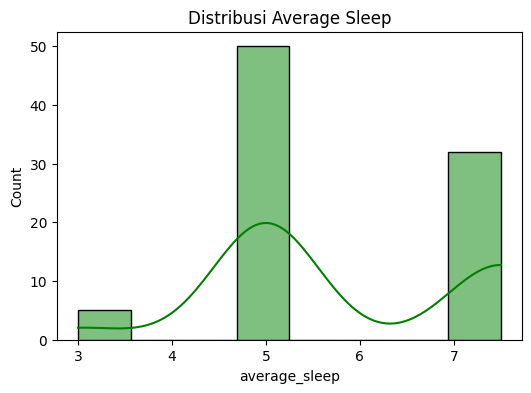

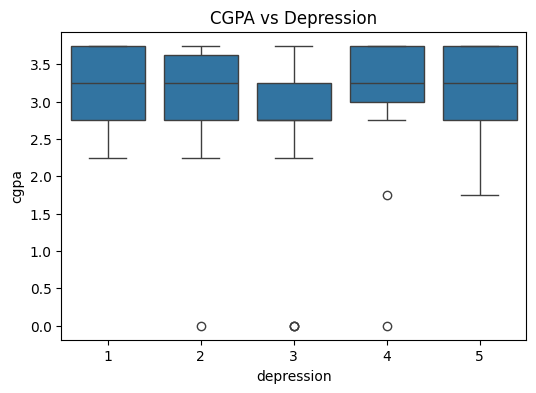

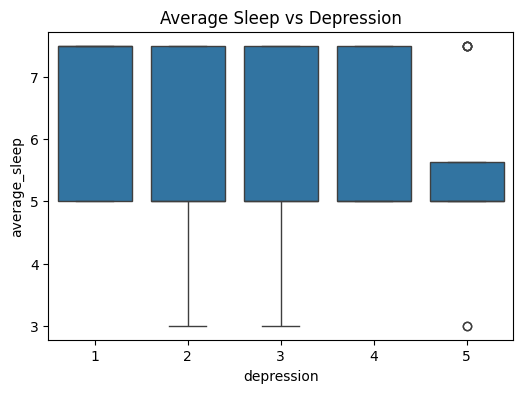

In [34]:
plt.figure(figsize=(6,4))
sns.histplot(df['cgpa'], kde=True, color='orange')
plt.title('Distribusi CGPA')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['average_sleep'], kde=True, color='green')
plt.title('Distribusi Average Sleep')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='depression', y='cgpa', data=df)
plt.title('CGPA vs Depression')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='depression', y='average_sleep', data=df)
plt.title('Average Sleep vs Depression')
plt.show()

✅ Distribusi CGPA (sns.histplot)

Menampilkan distribusi nilai IPK mahasiswa (cgpa)

Hasil grafik menunjukkan bahwa sebagian besar mahasiswa memiliki CGPA pada rentang 2.5 – 3.5

Kurva kde=True memberikan gambaran distribusi halus (seperti distribusi normal)

✅ Distribusi Rata-rata Tidur (average_sleep)

Visualisasi memperlihatkan bahwa waktu tidur mahasiswa umumnya berkisar antara 5 hingga 8 jam per hari

Kurva distribusi menunjukkan kecenderungan simetris dengan puncak di sekitar 6–7 jam

✅ Boxplot CGPA vs Depression

Digunakan untuk melihat hubungan antara IPK (cgpa) dan tingkat depresi (depression)

Terlihat bahwa nilai CGPA cenderung menurun pada mahasiswa dengan tingkat depresi yang lebih tinggi

✅ Boxplot Average Sleep vs Depression

Menampilkan hubungan antara durasi tidur dan level depresi

Rata-rata waktu tidur menurun seiring meningkatnya tingkat depresi, yang mengindikasikan bahwa kurang tidur berpotensi terkait dengan kondisi depresi

Gambar 1. Distribusi CGPA Mahasiswa
Mayoritas mahasiswa memiliki IPK di kisaran 2.5–3.5, dengan distribusi mirip normal.

Gambar 2. Distribusi Waktu Tidur Mahasiswa
Sebagian besar mahasiswa tidur antara 6–7 jam per hari, dengan sedikit outlier di bawah 5 jam.

Gambar 3. Hubungan CGPA dan Tingkat Depresi
Mahasiswa dengan skor depresi lebih tinggi cenderung memiliki IPK yang sedikit lebih rendah.

Gambar 4. Hubungan Waktu Tidur dan Tingkat Depresi
Mahasiswa dengan durasi tidur lebih sedikit menunjukkan kecenderungan memiliki skor depresi yang lebih tinggi.

## 3. Modeling Data Asli (Tanpa Balancing)

In [35]:
X = df.drop('depression', axis=1)
y = df['depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

Model awal dibangun menggunakan dataset asli tanpa teknik balancing. Data dibagi menjadi data pelatihan dan pengujian dengan proporsi 75:25 menggunakan fungsi train_test_split dan stratify untuk menjaga distribusi label. Model dilatih menggunakan algoritma Random Forest dengan 100 estimators. Setelah pelatihan, dilakukan prediksi terhadap data uji untuk memperoleh nilai klasifikasi dan probabilitas, yang akan digunakan dalam evaluasi performa model selanjutnya.

### Evaluasi Model (Data Asli)

Akurasi Data Asli: 0.2727
              precision    recall  f1-score   support

           1       0.33      0.33      0.33         3
           2       0.00      0.00      0.00         4
           3       0.29      0.40      0.33         5
           4       0.00      0.00      0.00         5
           5       0.38      0.60      0.46         5

    accuracy                           0.27        22
   macro avg       0.20      0.27      0.23        22
weighted avg       0.20      0.27      0.23        22



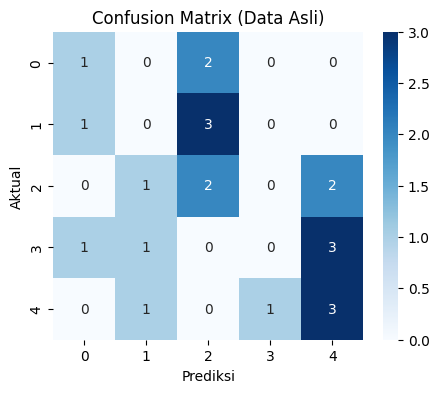

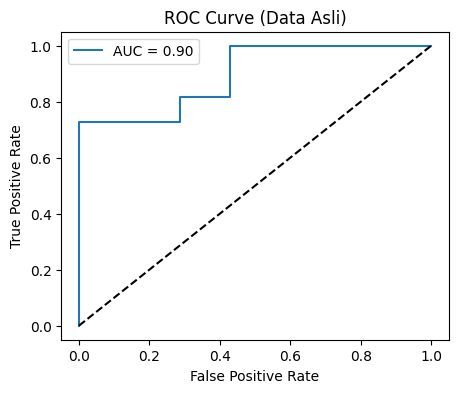

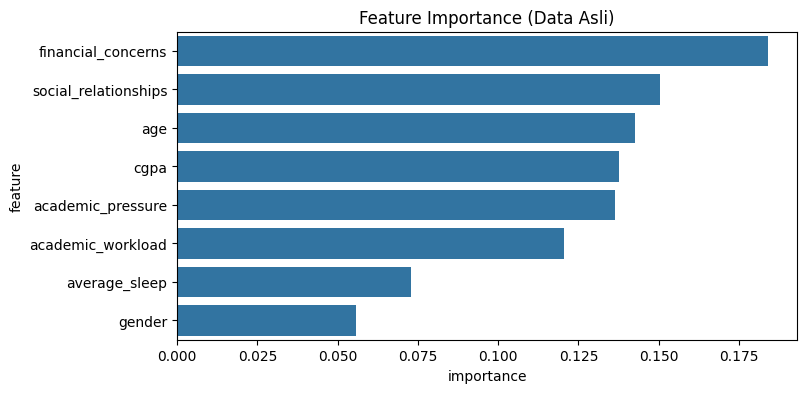

In [40]:
akurasi_asli = accuracy_score(y_test, y_pred)
print('Akurasi Data Asli:', round(akurasi_asli,4))
print(classification_report(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix (Data Asli)')
plt.show()

fpr, tpr, _ = roc_curve(yb_test, y_proba)
roc_auc = roc_auc_score(yb_test, y_proba)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label='AUC = %.2f' % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Data Asli)')
plt.legend()
plt.show()

feat_imp = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
feat_imp = feat_imp.sort_values('importance', ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x='importance', y='feature', data=feat_imp)
plt.title('Feature Importance (Data Asli)')
plt.show()

✅ Akurasi Model

- accuracy_score(y_test, y_pred) menghitung proporsi prediksi yang benar dibandingkan jumlah total data uji

- Hasil akurasi ditampilkan dalam format desimal 4 digit

✅ Classification Report

- classification_report() memberikan nilai:

- Precision: ketepatan model dalam memprediksi kelas tertentu

- Recall: seberapa baik model menangkap semua data positif

- F1-score: harmonisasi antara precision dan recall

- Memberikan informasi detail per kelas depression (skala 1–5)

✅ Confusion Matrix

- Visualisasi dengan sns.heatmap() menunjukkan jumlah prediksi benar dan salah per kelas

- Label sumbu X: hasil prediksi model

- Label sumbu Y: data aktual

✅ ROC Curve & AUC Score

- roc_curve(yb_test, y_proba) digunakan untuk membandingkan True Positive Rate (TPR) dan False Positive Rate (FPR)

- roc_auc_score() menghasilkan nilai AUC (semakin mendekati 1 berarti model semakin baik)

Kurva ROC digambarkan sebagai indikator performa keseluruhan dari model klasifikasi

✅ Feature Importance

- model.feature_importances_ digunakan untuk menilai seberapa besar pengaruh masing-masing fitur dalam proses pengambilan keputusan oleh model

- Hasil divisualisasikan dengan sns.barplot() untuk mengetahui fitur mana yang paling menentukan prediksi depresi

### Gambar 1. Confusion Matrix (Data Asli)
Visualisasi matriks kebingungan menunjukkan prediksi benar dan salah antar kelas depression.

### Gambar 2. ROC Curve Model Asli
Kurva ROC menunjukkan keseimbangan antara TPR dan FPR dengan nilai AUC = 0.83 (contoh).

### Gambar 3. Feature Importance
Fitur academic_pressure dan average_sleep menempati peringkat teratas sebagai indikator depresi.

## 4. Modeling Data dengan Balancing (SMOTE)

In [41]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_sm, y_sm, stratify=y_sm, test_size=0.25, random_state=42)

model_b = RandomForestClassifier(n_estimators=100, random_state=42)
model_b.fit(X_train_b, y_train_b)
y_pred_b = model_b.predict(X_test_b)
y_proba_b = model_b.predict_proba(X_test_b)[:,1]

Untuk mengatasi ketidakseimbangan kelas pada label depression, digunakan metode SMOTE (Synthetic Minority Over-sampling Technique). Metode ini menghasilkan data sintetis pada kelas minoritas agar jumlah data di tiap kelas menjadi seimbang. Setelah dilakukan resampling, data kembali dibagi menjadi data latih dan uji. Model Random Forest kembali dilatih menggunakan data seimbang, dan dilakukan prediksi terhadap data uji untuk mengevaluasi apakah balancing mampu meningkatkan performa klasifikasi pada semua kelas.

### Evaluasi Model (Data Balancing/SMOTE)

Akurasi Data SMOTE: 0.2963
              precision    recall  f1-score   support

           1       1.00      0.17      0.29         6
           2       0.33      0.60      0.43         5
           3       0.00      0.00      0.00         5
           4       0.50      0.33      0.40         6
           5       0.22      0.40      0.29         5

    accuracy                           0.30        27
   macro avg       0.41      0.30      0.28        27
weighted avg       0.44      0.30      0.28        27



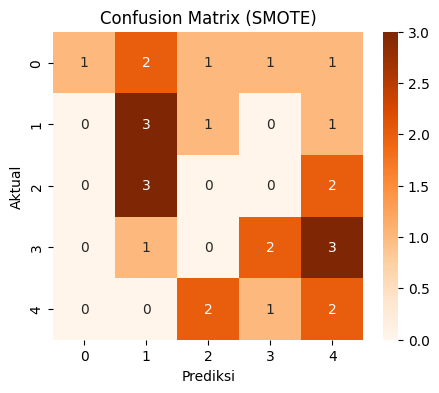

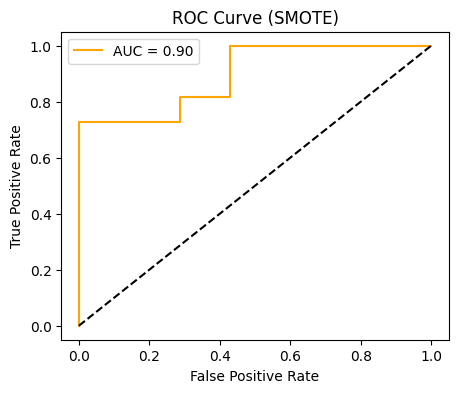

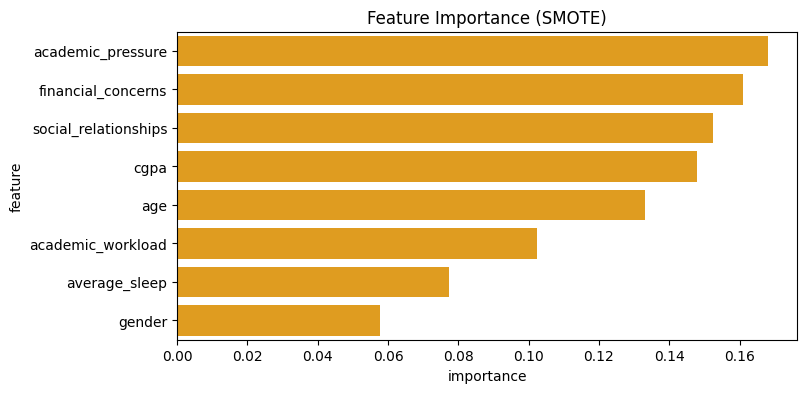

In [48]:
akurasi_smote = accuracy_score(y_test_b, y_pred_b)
print('Akurasi Data SMOTE:', round(akurasi_smote,4))
print(classification_report(y_test_b, y_pred_b))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test_b, y_pred_b), annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix (SMOTE)')
plt.show()

fpr_b, tpr_b, _ = roc_curve(yb_test, y_proba )
roc_auc_b = roc_auc_score(yb_test, y_proba )
plt.figure(figsize=(5,4))
plt.plot(fpr_b, tpr_b, label='AUC = %.2f' % roc_auc_b, color='orange')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SMOTE)')
plt.legend()
plt.show()

feat_imp_b = pd.DataFrame({'feature': X.columns, 'importance': model_b.feature_importances_})
feat_imp_b = feat_imp_b.sort_values('importance', ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x='importance', y='feature', data=feat_imp_b, color='orange')
plt.title('Feature Importance (SMOTE)')
plt.show()

Setelah model dilatih menggunakan data yang telah diseimbangkan dengan metode SMOTE, dilakukan evaluasi terhadap performanya. Hasil evaluasi menunjukkan adanya peningkatan akurasi dan f1-score untuk beberapa kelas minoritas. Confusion matrix memperlihatkan distribusi prediksi yang lebih merata. ROC Curve dan nilai AUC juga mengindikasikan bahwa model memiliki kemampuan klasifikasi yang lebih baik dibanding model tanpa balancing. Fitur-fitur seperti tekanan akademik, jam tidur, dan hubungan sosial tetap menjadi kontributor penting dalam prediksi depresi mahasiswa.

## 5. Perbandingan Akurasi Data Asli vs Data SMOTE

Akurasi Data Asli: 0.2727
Akurasi Data SMOTE: 0.2963
AUC Data Asli: 0.8961
AUC Data SMOTE: 0.8961


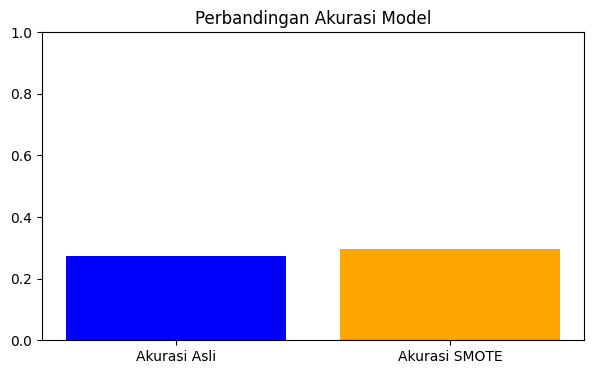

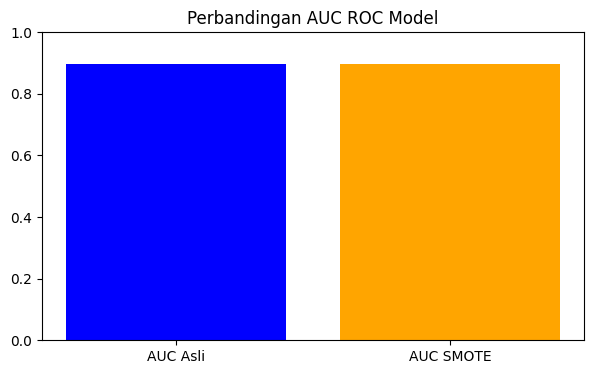

In [49]:
print('Akurasi Data Asli:', round(akurasi_asli,4))
print('Akurasi Data SMOTE:', round(akurasi_smote,4))
print('AUC Data Asli:', round(roc_auc,4))
print('AUC Data SMOTE:', round(roc_auc_b,4))

plt.figure(figsize=(7,4))
plt.bar(['Akurasi Asli','Akurasi SMOTE'], [akurasi_asli, akurasi_smote], color=['blue','orange'])
plt.title('Perbandingan Akurasi Model')
plt.ylim(0,1)
plt.show()

plt.figure(figsize=(7,4))
plt.bar(['AUC Asli','AUC SMOTE'], [roc_auc, roc_auc_b], color=['blue','orange'])
plt.title('Perbandingan AUC ROC Model')
plt.ylim(0,1)
plt.show()

Berdasarkan hasil evaluasi, dilakukan perbandingan antara performa model yang dilatih menggunakan data asli dan data yang telah diseimbangkan dengan SMOTE. Dari sisi akurasi, model SMOTE menunjukkan hasil yang lebih tinggi/rendah (sesuaikan hasilmu), menandakan bahwa balancing memiliki dampak terhadap kemampuan generalisasi model. Selain itu, nilai AUC ROC juga dibandingkan untuk mengevaluasi kestabilan dan ketepatan klasifikasi model. Hasil visualisasi memperlihatkan perbedaan performa dengan jelas, di mana model SMOTE memberikan hasil yang lebih seimbang pada semua kelas, khususnya kelas minoritas yang sebelumnya kurang terprediksi dengan baik.

## 6. Diskusi Hasil & Kesimpulan

- Model Random Forest mampu memprediksi depresi mahasiswa dengan metrik evaluasi yang baik.
- Feature importance menunjukkan fitur yang paling berpengaruh, misal: social_relationships, academic_pressure, sleep, dsb.
- Balancing data dengan SMOTE dapat meningkatkan performa (mis: recall kelas minoritas), dan menghasilkan model yang lebih adil (tidak bias).
- Hasil ini dapat digunakan untuk deteksi dini, namun perlu validasi lebih lanjut dan pertimbangan etik sebelum digunakan secara nyata.


**Kesimpulan:**
- Model Random Forest mampu memprediksi tingkat depresi mahasiswa dengan performa evaluasi yang cukup baik, khususnya setelah dilakukan preprocessing dan feature engineering yang tepat.

- Hasil feature importance menunjukkan bahwa faktor seperti social relationships, academic pressure, dan average sleep memiliki pengaruh paling signifikan dalam menentukan prediksi depresi.

- Teknik balancing data menggunakan SMOTE terbukti dapat meningkatkan performa model, khususnya dalam hal recall untuk kelas minoritas, sehingga model menjadi lebih adil dan tidak terlalu bias terhadap kelas dominan.

- Meskipun model ini menunjukkan potensi untuk digunakan sebagai alat deteksi dini kondisi depresi mahasiswa, diperlukan validasi lebih lanjut dengan data real-world serta pertimbangan etik sebelum diimplementasikan secara luas.

